## 各々の銘柄が安全かどうかを特定する

In [4]:

import json

with open("data/all_gene_data.json") as f:
    gene_data = json.load(f)


In [5]:
gene_data

{'0x': {'volume': [8545915.97443891,
   8032116.273514106,
   22435833.35674993,
   20094981.62629795,
   8362606.453768615,
   8276815.958823071,
   13479168.0189941,
   10138793.462931365,
   13881356.761138855,
   13838589.150679365,
   17351047.5962733,
   14970906.766653204,
   17379098.088798698,
   16729562.41645832,
   17512914.726436872,
   14177147.079315824,
   17782652.503460474,
   11265123.756477896,
   16852720.187391225,
   15223594.815311708,
   7825426.951683744,
   8274580.596021907,
   7795058.065630181,
   13501997.63758913,
   11627597.225098409,
   7259904.7449555155,
   7279956.330960081,
   10045047.78287464,
   30063100.131568003,
   3156690.519387568,
   896059.0072196343,
   1106319.044210795,
   3289521.010813066,
   9030369.041861415,
   10898428.584187696,
   10045018.456529653,
   7178574.35015121,
   5532770.111315612,
   6166645.228897314,
   10195364.655303769,
   5934846.920848238,
   5362807.518626788,
   2973028.934320677,
   3762475.489912454,
   

In [6]:
print(len(gene_data))

302


In [7]:
import pandas as pd

target_dataframe = pd.DataFrame({
    "id": [],
    "time": [],
    "price": [],
    "volume": [],
})

In [8]:
for i, (key, value) in enumerate(gene_data.items()):
    format_data = []
    for j in range(len(value["price"])):
        time = j + 1
        add_list = [key, time, value["price"][j], value["volume"][j]]
        format_data.append(add_list)
    format_dataframe = pd.DataFrame(format_data, columns=["id", "time", "price", "volume"])
    target_dataframe = pd.concat([target_dataframe, format_dataframe])

In [9]:
target_dataframe

,id,time,price,volume
0,0x,1.0,0.365994,8.545916e+06
1,0x,2.0,0.356034,8.032116e+06
2,0x,3.0,0.367956,2.243583e+07
3,0x,4.0,0.370270,2.009498e+07
4,0x,5.0,0.382952,8.362606e+06
...,...,...,...,...
96,zilliqa,97.0,0.025014,3.646300e+07
97,zilliqa,98.0,0.024609,1.943126e+07
98,zilliqa,99.0,0.023748,1.552979e+07
99,zilliqa,100.0,0.024842,1.441211e+07


### 特徴量生成

In [10]:
from tsfresh.feature_extraction import extract_features

target_features = extract_features(
    timeseries_container=target_dataframe,
    default_fc_parameters=None,
    column_id='id',
    column_sort='time',
    column_kind=None,
    column_value=None
)


Feature Extraction: 100%|██████████| 20/20 [00:05<00:00,  3.43it/s]


In [11]:
price_data = target_features["price__partial_autocorrelation__lag_4"]

In [12]:
volume_data = target_features["volume__longest_strike_below_mean"]

In [21]:
volume_data

0x                   25.0
1inch                59.0
aave                 34.0
aavegotchi           14.0
acala                53.0
                     ... 
yield-guild-games    20.0
zcash                 6.0
zcoin                29.0
zelcash              18.0
zilliqa              28.0
Name: volume__longest_strike_below_mean, Length: 302, dtype: float64

In [28]:
price_data

0x                   0.141705
1inch               -0.061980
aave                -0.050742
aavegotchi          -0.029901
acala               -0.095585
                       ...   
yield-guild-games    0.149966
zcash               -0.121683
zcoin                0.160272
zelcash              0.037126
zilliqa             -0.058324
Name: price__partial_autocorrelation__lag_4, Length: 302, dtype: float64

In [24]:

safe_index = []

for i, key in enumerate(price_data.keys()):
    if price_data[i] < -0.04626578459176222 and volume_data[i] > 19.6:
        safe_index.append(key)

In [27]:
safe_index

'1inch'

In [29]:
import json

with open("data/gene_safe_stock.json", "w") as file:
    json.dump(safe_index, file, indent=4)

In [13]:
71.5/(365/100)

19.589041095890412

/var/folders/56/psj7ncmx4wg4kv9hzqkrrnmc0000gn/T/ipykernel_15267/262804059.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


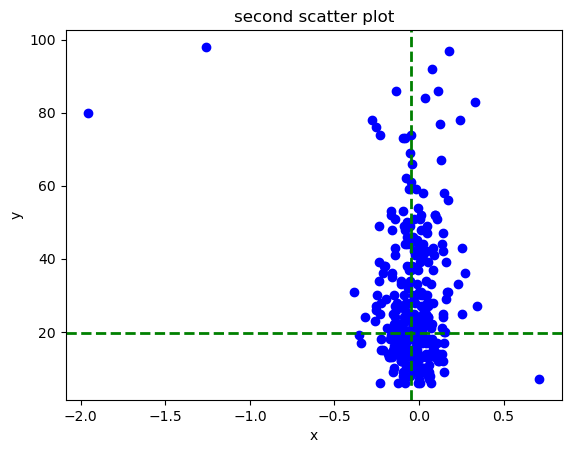

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(price_data,volume_data, c='blue')

ax.axhline(y=19.6, color='green', linestyle='--', linewidth=2, label='Group 1 Mean')
ax.axvline(x=-0.04626578459176222, color='green', linestyle='--', linewidth=2, label='Group 1 Mean')

ax.set_title('second scatter plot')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.show()

In [15]:
remove_price = []
remove_volume = []
index_value = []

In [16]:
for i, value in enumerate(price_data):
    if value < -1 or value > 0.5:
        index_value.append(i)
    else:
        remove_price.append(value)
        remove_volume.append(volume_data[i])


/var/folders/56/psj7ncmx4wg4kv9hzqkrrnmc0000gn/T/ipykernel_15267/743139022.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


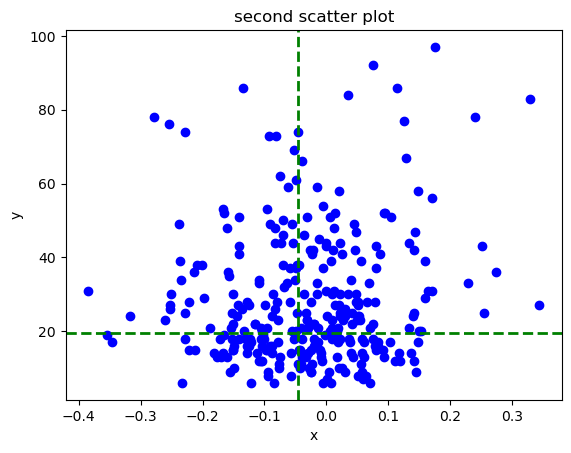

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(remove_price,remove_volume, c='blue')

ax.axhline(y=19.6, color='green', linestyle='--', linewidth=2, label='Group 1 Mean')
ax.axvline(x=-0.04626578459176222, color='green', linestyle='--', linewidth=2, label='Group 1 Mean')

ax.set_title('second scatter plot')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.show()

## 安全な銘柄